In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import torch
from utils import *
import seaborn as sns
from dataset import phenocamdata
from PIL import Image

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
site_name = "NEON.D01.BART.DP1.00033"
img_path = "C:/Users/paldebas/Documents/Research Work/GAN (Phenology Images)/phenocamdata/"
curr_wd = "D:/GAN (Phenology Images)/Codes/Conditional_GAN_GCC_Reduced/"
image_height=480
image_width = 648
latent_dim=128
num_samples = 10
roi_id = "DB_1000"
roi_mask_file = "C:/Users/paldebas/Documents/Research Work/GAN (Phenology Images)/phenocamdata/roi/"+site_name+"_"+roi_id+"_01.tif"
roi_stats_url = "https://phenocam.sr.unh.edu/data/archive/"+site_name+"/ROI/"+site_name+"_"+roi_id+"_roistats.csv"
#train_data = phenocamdata(img_path, site_name, image_height=image_height, image_width=image_width, roi_id=roi_id, file_type="/*.jpg", is_train=True)
test_data = phenocamdata(img_path, site_name, image_height=image_height, image_width=image_width, roi_id=roi_id, file_type="/*.jpg", is_train=False)
#roi = train_data.load_roi()

In [4]:
gcc_bins = [0.27, 0.34, 0.37, 0.40, 0.44, 0.48]
test_data.dataset["gcc_bin"]=pd.cut(test_data.dataset["gcc"], bins=gcc_bins)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


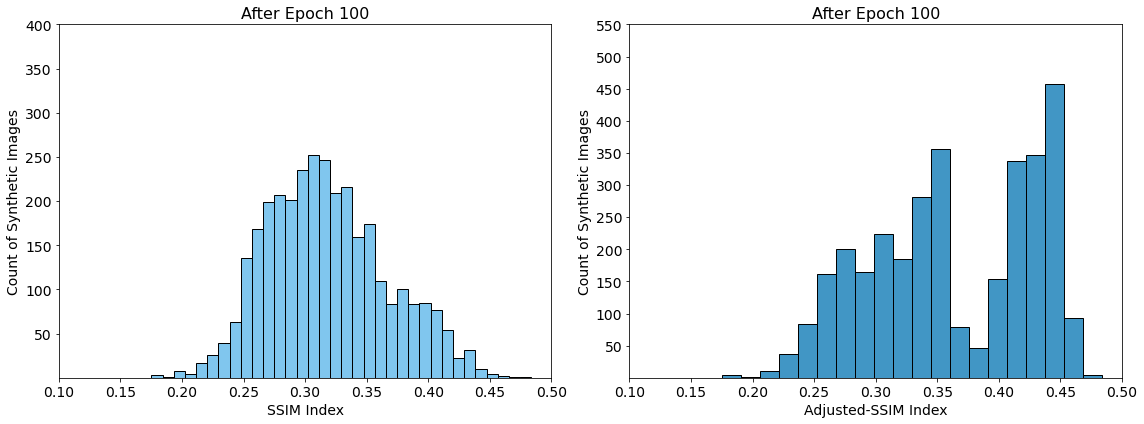

In [19]:
version = "v13_SN_SA_3_1_orthogonal_cross_site"
path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version)
start_epoch = 1075
fig, axs = plt.subplots(1, 2, figsize=(16,6), squeeze=True)
#fig.suptitle("Epoch Wise SSIM Histogram (v13_SN_SA_1: beta1=0.5)", fontsize=15)
axs = axs.flatten()

data = np.load(os.path.join(path, "modified_ssim_epoch_"+str(start_epoch)+".npy")) 
sns.histplot(data, color='#0173b2', ax = axs[1])
axs[1].set_xlabel("Adjusted-SSIM Index", fontsize=14)
axs[1].set_ylabel("Count of Synthetic Images", fontsize=14)
axs[1].set_xticks(np.arange(0.1,0.52, 0.05))
axs[1].set_yticks(np.arange(50,600, 50))
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("After Epoch %d"%(start_epoch-975), fontsize=16)

data = np.load(os.path.join(path, "ssim_epoch_"+str(start_epoch)+".npy")) 
sns.histplot(data, color='#56b4e9', ax = axs[0])
axs[0].set_xlabel("SSIM Index", fontsize=14)
axs[0].set_ylabel("Count of Synthetic Images", fontsize=14)
axs[0].set_xticks(np.arange(0.1,0.52, 0.05))
axs[0].set_yticks(np.arange(50,450, 50))
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("After Epoch %d"%(start_epoch-975), fontsize=16)
fig.tight_layout()
plt.savefig("plots/BART_SSIM_cross_site.eps")
#plt.subplots_adjust(top=0.93)
plt.show()


In [8]:
model = "DCGAN"
version = "v13_SN_SA_3_1_orthogonal_cross_site"
path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version, "Epoch_1075")
synthetic_image_list = []
file_type = "/*.jpg"
synthetic_images = glob.glob(path + file_type)
for img in synthetic_images:
    synthetic_image_list.append(os.path.basename(img))
synthetic_image_df = pd.DataFrame(synthetic_image_list, columns=["synthetic_img_file_name"])
synthetic_image_df["test_image_name"]= synthetic_image_df["synthetic_img_file_name"].str.slice(10,55)
temp= synthetic_image_df["synthetic_img_file_name"].str[56:].str.split(".",expand=True)
synthetic_image_df["synthetic_image_index"] = temp[0].astype(int)
synthetic_image_df.sort_values(by=['synthetic_image_index'], inplace=True, ignore_index=True)

path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version)
data = np.load(os.path.join(path, "modified_ssim_epoch_"+str(1075)+".npy")) 
synthetic_image_df["modified_SSIM_v13_SN_SA_1"] = data

path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version)
data = np.load(os.path.join(path, "ssim_epoch_"+str(1075)+".npy")) 
synthetic_image_df["SSIM_v13_SN_SA_1"] = data

path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version)
data = np.load(os.path.join(path, "computed_gcc_epoch_"+str(1075)+".npy")) 
synthetic_image_df["gcc_v13_SN_SA_1"] = data

path = os.path.join(curr_wd, "synthetic_test_images", site_name +"_" + roi_id, "DCGAN_HingeGAN_" + version)
data = np.load(os.path.join(path, "predicted_rcc_epoch_"+str(1075)+".npy")) 
synthetic_image_df["rcc_v13_SN_SA_1"] = data

synthetic_image_df

,synthetic_img_file_name,test_image_name,synthetic_image_index,modified_SSIM_v13_SN_SA_1,SSIM_v13_SN_SA_1,gcc_v13_SN_SA_1,rcc_v13_SN_SA_1
0,synthetic_NEON.D01.BART.DP1.00033_2021_01_17_1...,NEON.D01.BART.DP1.00033_2021_01_17_103006.jpg,0,0.448064,0.263599,0.345920,0.335965
1,synthetic_NEON.D01.BART.DP1.00033_2021_08_18_1...,NEON.D01.BART.DP1.00033_2021_08_18_130006.jpg,1,0.324055,0.324055,0.444867,0.330247
2,synthetic_NEON.D01.BART.DP1.00033_2021_01_29_1...,NEON.D01.BART.DP1.00033_2021_01_29_120005.jpg,2,0.436597,0.374803,0.346088,0.342283
3,synthetic_NEON.D01.BART.DP1.00033_2021_08_14_1...,NEON.D01.BART.DP1.00033_2021_08_14_140006.jpg,3,0.350656,0.310919,0.449690,0.328879
4,synthetic_NEON.D01.BART.DP1.00033_2021_09_16_1...,NEON.D01.BART.DP1.00033_2021_09_16_113005.jpg,4,0.271235,0.256258,0.416249,0.362533
...,...,...,...,...,...,...,...
3222,synthetic_NEON.D01.BART.DP1.00033_2021_01_29_1...,NEON.D01.BART.DP1.00033_2021_01_29_100005.jpg,3222,0.390487,0.317771,0.346585,0.332958
3223,synthetic_NEON.D01.BART.DP1.00033_2021_08_23_1...,NEON.D01.BART.DP1.00033_2021_08_23_123005.jpg,3223,0.352318,0.352318,0.453626,0.329273
3224,synthetic_NEON.D01.BART.DP1.00033_2021_06_26_1...,NEON.D01.BART.DP1.00033_2021_06_26_110005.jpg,3224,0.331845,0.331845,0.464022,0.326723
3225,synthetic_NEON.D01.BART.DP1.00033_2021_04_13_1...,NEON.D01.BART.DP1.00033_2021_04_13_100005.jpg,3225,0.432025,0.372548,0.345901,0.334447


In [9]:
test_data.dataset= pd.merge(left = test_data.dataset, right = synthetic_image_df, how='inner', 
                   left_on=['image_file_name'], right_on=['test_image_name'])
test_data.dataset

,image_file_name,image_file_path,gcc,rcc,gcc_rounded,gcc_bin,synthetic_img_file_name,test_image_name,synthetic_image_index,modified_SSIM_v13_SN_SA_1,SSIM_v13_SN_SA_1,gcc_v13_SN_SA_1,rcc_v13_SN_SA_1
0,NEON.D01.BART.DP1.00033_2021_01_01_100005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34264,0.38700,34.26,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_01_1...,NEON.D01.BART.DP1.00033_2021_01_01_100005.jpg,2104,0.416899,0.293947,0.347821,0.332815
1,NEON.D01.BART.DP1.00033_2021_01_01_103005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34294,0.38904,34.29,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_01_1...,NEON.D01.BART.DP1.00033_2021_01_01_103005.jpg,875,0.434205,0.309039,0.346065,0.335289
2,NEON.D01.BART.DP1.00033_2021_01_01_110005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34306,0.39076,34.31,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_01_1...,NEON.D01.BART.DP1.00033_2021_01_01_110005.jpg,165,0.391380,0.299998,0.346604,0.332371
3,NEON.D01.BART.DP1.00033_2021_01_01_113006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34328,0.39293,34.33,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_01_1...,NEON.D01.BART.DP1.00033_2021_01_01_113006.jpg,2660,0.401547,0.308139,0.346179,0.335350
4,NEON.D01.BART.DP1.00033_2021_01_01_120006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34291,0.39112,34.29,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_01_1...,NEON.D01.BART.DP1.00033_2021_01_01_120006.jpg,3072,0.434940,0.309787,0.346146,0.334450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,NEON.D01.BART.DP1.00033_2021_12_31_120006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34446,0.33705,34.45,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_12_31_1...,NEON.D01.BART.DP1.00033_2021_12_31_120006.jpg,889,0.419103,0.356719,0.345955,0.338361
3223,NEON.D01.BART.DP1.00033_2021_12_31_123006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34521,0.35098,34.52,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_12_31_1...,NEON.D01.BART.DP1.00033_2021_12_31_123006.jpg,809,0.427316,0.353265,0.346338,0.341732
3224,NEON.D01.BART.DP1.00033_2021_12_31_130005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34393,0.30789,34.39,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_12_31_1...,NEON.D01.BART.DP1.00033_2021_12_31_130005.jpg,2048,0.411030,0.391155,0.345689,0.337113
3225,NEON.D01.BART.DP1.00033_2021_12_31_133005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34695,0.35659,34.70,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_12_31_1...,NEON.D01.BART.DP1.00033_2021_12_31_133005.jpg,3180,0.402661,0.360219,0.348464,0.352388


In [10]:
y_true = test_data.dataset["gcc"]
y_pred = test_data.dataset["gcc_v13_SN_SA_1"]
#np.sqrt(np.sum(np.square(test_gcc-computed_gcc))/num_test_samples)
rmse_gcc = (np.sqrt(np.mean(np.square((y_true - y_pred)))))
rmspe_gcc = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
print(rmse_gcc)
print(rmspe_gcc)

y_true = test_data.dataset["rcc"]
y_pred = test_data.dataset["rcc_v13_SN_SA_1"]
#np.sqrt(np.sum(np.square(test_gcc-computed_gcc))/num_test_samples)
rmse_rcc = (np.sqrt(np.mean(np.square((y_true - y_pred)))))
rmspe_rcc = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
print(rmse_rcc)
print(rmspe_rcc)

0.011963725849790796
3.002358049957625
0.04839133914621468
12.168099515720026


In [11]:
test_data.dataset[test_data.dataset["SSIM_v13_SN_SA_1"]>=0.28]["gcc_bin"].unique()

[(0.34, 0.37], (0.27, 0.34], (0.37, 0.4], (0.4, 0.44], (0.44, 0.48]]
Categories (5, interval[float64, right]): [(0.27, 0.34] < (0.34, 0.37] < (0.37, 0.4] < (0.4, 0.44] < (0.44, 0.48]]

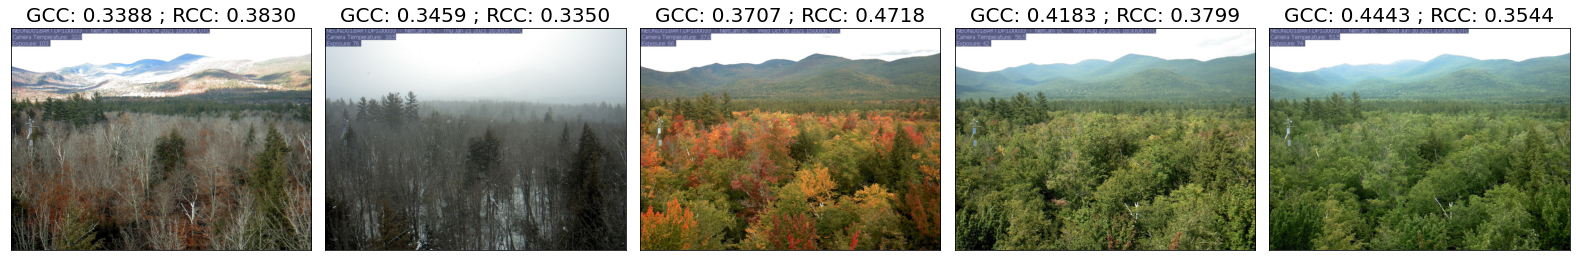

In [14]:
temp_test_df =test_data.dataset[test_data.dataset["SSIM_v13_SN_SA_1"]>0.28]
sampled_test_df = temp_test_df.groupby("gcc_bin").sample(n=1, replace=False, random_state=1).reset_index()
# Save the test images for comparison
fig, axs = plt.subplots(1, 5, figsize=(22,6), squeeze=True, facecolor='w')
#fig.suptitle("Sample Test Images\n", fontsize=25, color = 'black')
axs = axs.flatten()
for i in range(0, 5):
    test_img = tensor_to_PIL(denorm(test_data.__getitem__(sampled_test_df["index"][i])[0]))
    axs[i].imshow(test_img)
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    axs[i].set_title("GCC: %.4f ; RCC: %.4f"%(sampled_test_df["gcc"][i], sampled_test_df["rcc"][i]), fontsize=20, color='black')
    fig.tight_layout()
plt.tight_layout()
#plt.savefig()
plt.show()
plt.close() 


In [15]:
sampled_test_df

,index,image_file_name,image_file_path,gcc,rcc,gcc_rounded,gcc_bin,synthetic_img_file_name,test_image_name,synthetic_image_index,modified_SSIM_v13_SN_SA_1,SSIM_v13_SN_SA_1,gcc_v13_SN_SA_1,rcc_v13_SN_SA_1
0,2716,NEON.D01.BART.DP1.00033_2021_11_04_133006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.33884,0.38299,33.88,"(0.27, 0.34]",synthetic_NEON.D01.BART.DP1.00033_2021_11_04_1...,NEON.D01.BART.DP1.00033_2021_11_04_133006.jpg,2370,0.291872,0.291872,0.351521,0.348013
1,177,NEON.D01.BART.DP1.00033_2021_01_21_113005.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.34591,0.33500,34.59,"(0.34, 0.37]",synthetic_NEON.D01.BART.DP1.00033_2021_01_21_1...,NEON.D01.BART.DP1.00033_2021_01_21_113005.jpg,963,0.440064,0.400793,0.346949,0.346502
2,2457,NEON.D01.BART.DP1.00033_2021_10_06_100006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.37072,0.47180,37.07,"(0.37, 0.4]",synthetic_NEON.D01.BART.DP1.00033_2021_10_06_1...,NEON.D01.BART.DP1.00033_2021_10_06_100006.jpg,2886,0.284850,0.284850,0.383831,0.443590
3,2093,NEON.D01.BART.DP1.00033_2021_08_25_133006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.41826,0.37990,41.83,"(0.4, 0.44]",synthetic_NEON.D01.BART.DP1.00033_2021_08_25_1...,NEON.D01.BART.DP1.00033_2021_08_25_133006.jpg,1130,0.293986,0.286096,0.438284,0.335905
4,1601,NEON.D01.BART.DP1.00033_2021_06_30_123006.jpg,C:/Users/paldebas/Documents/Research Work/GAN ...,0.44429,0.35439,44.43,"(0.44, 0.48]",synthetic_NEON.D01.BART.DP1.00033_2021_06_30_1...,NEON.D01.BART.DP1.00033_2021_06_30_123006.jpg,2001,0.332962,0.332962,0.457218,0.327809


In [16]:
list(sampled_test_df["image_file_name"])

['NEON.D01.BART.DP1.00033_2021_11_04_133006.jpg',
 'NEON.D01.BART.DP1.00033_2021_01_21_113005.jpg',
 'NEON.D01.BART.DP1.00033_2021_10_06_100006.jpg',
 'NEON.D01.BART.DP1.00033_2021_08_25_133006.jpg',
 'NEON.D01.BART.DP1.00033_2021_06_30_123006.jpg']

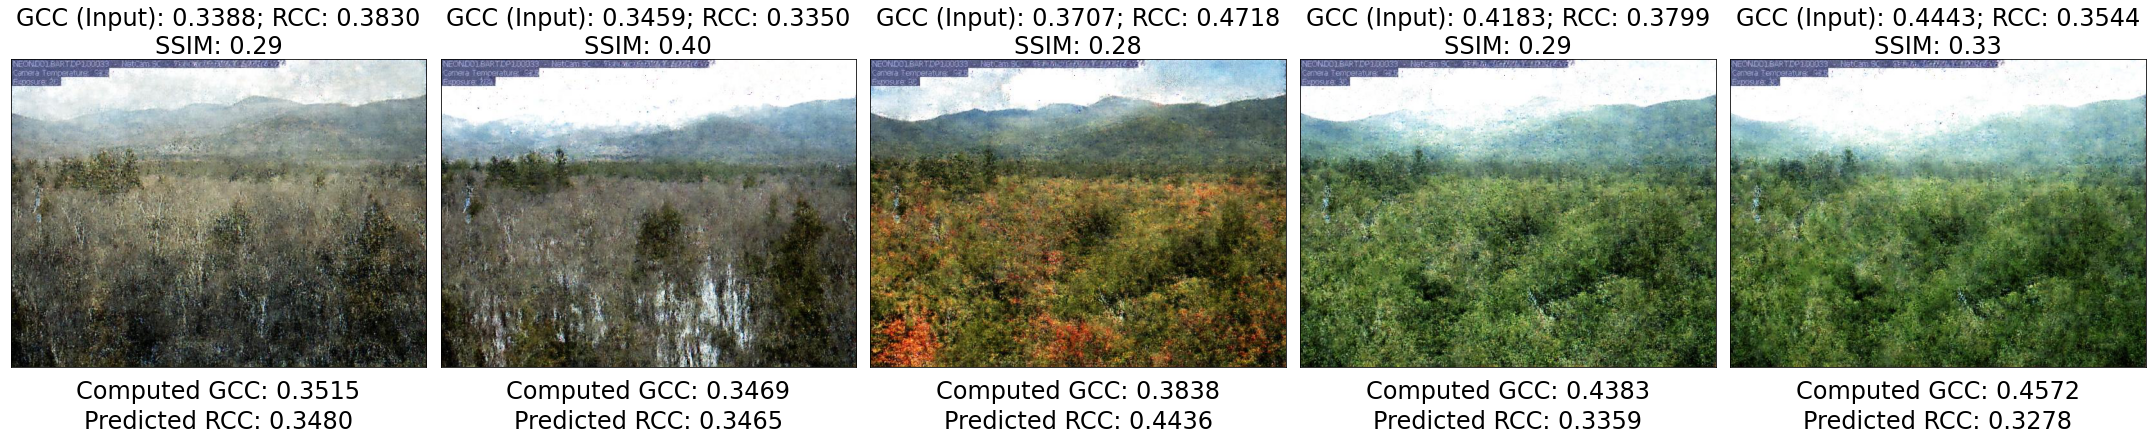

In [18]:
model = "DCGAN"
adv_loss = "HingeGAN"
version = "v13_SN_SA_3_1_orthogonal_cross_site"
trained_models = [1075]
folder_name = model + "_" + adv_loss + "_" + version
for trained_model in trained_models:
    fig, axs = plt.subplots(1, 5, figsize=(30,16), squeeze=True, facecolor='w')
    #fig.suptitle("After epoch %d\n"%(trained_model), fontsize=30, color='black')
    axs = axs.flatten()
    for i in range(0, 5):
        synthetic_img = Image.open(os.path.join(curr_wd, "synthetic_test_images",  site_name +"_" + roi_id, folder_name, "Epoch_"+str(trained_model), 
                                   sampled_test_df["synthetic_img_file_name"][i])).convert("RGB")
        gcc = sampled_test_df["gcc_v13_SN_SA_1"][i]
        rcc = sampled_test_df["rcc_v13_SN_SA_1"][i]
        ssim_score = sampled_test_df["SSIM_v13_SN_SA_1"][i]
        axs[i].imshow(synthetic_img)
        axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        axs[i].set_title("GCC (Input): %.4f; RCC: %.4f\nSSIM: %.2f"%(sampled_test_df["gcc"][i], sampled_test_df["rcc"][i], ssim_score), fontsize=24, color='black')
        axs[i].text(0.5,-0.1, "Computed GCC: %.4f"%(gcc), size=24,  color='black', ha="center", transform=axs[i].transAxes)
        axs[i].text(0.5,-0.2, "Predicted RCC: %.4f"%(rcc), size=24,  color='black', ha="center", transform=axs[i].transAxes)
    fig.tight_layout()
    plt.savefig("plots/BART_synthetic_image_cross_site.eps", bbox_inches='tight')
    plt.show()
    plt.close()
